## ------------------------------------------------------LEVEL - 3------------------------------------------------------

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [3]:
df = pd.read_csv('Dataset .csv')
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1 :- Predictive Modeling

#### ◉ Build a regression model to predict theaggregate rating of a restaurant based onavailable features.
#### ◉ Split the dataset into training and testing setsand evaluate the model's performance usingappropriate metrics.
#### ◉ Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.get_dummies(df,columns=['Has Table booking','Has Online delivery'],drop_first= True)

In [7]:
X = df[['Average Cost for two','Votes','Price range','Has Table booking_Yes','Has Online delivery_Yes']]
y = df['Aggregate rating']

In [8]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Model:Linear Regression")
print("Mean Square Error (MSE): ",mse)
print('R-squared(R2)Score :',r2)

Model:Linear Regression
Mean Square Error (MSE):  1.6764802747031442
R-squared(R2)Score : 0.2634446409021949


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [11]:
models={
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

result = {}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test , y_pred)
    result[name] = {"MSE": mse, "R2 Score":r2}
result_df=pd.DataFrame(result)
print(result_df)
    


          Linear Regression  Decision Tree  Random Forest
MSE                1.676480       0.203498       0.133938
R2 Score           0.263445       0.910594       0.941155


## Task 2 :- Customer Preference Analysis

#### ◉ Analyze the relationship between the type ofcuisine and the restaurant's rating.
#### ◉ Identify the most popular cuisines amongcustomers based on the number of votes.
#### ◉ Determine if there are any specific cuisinesthat tend to receive higher ratings.

In [12]:
cuisines = df['Cuisines']

In [13]:
cuisines.value_counts().head(10)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

In [14]:
top_10_cuisines = cuisines.value_counts().head(10).index

In [15]:
cuisine_ratings = pd.DataFrame({'Cuisine':cuisines,'Rating':df['Aggregate rating']})

In [16]:
cuisine_ratings_top_10 = cuisine_ratings[cuisine_ratings['Cuisine'].isin(top_10_cuisines)]

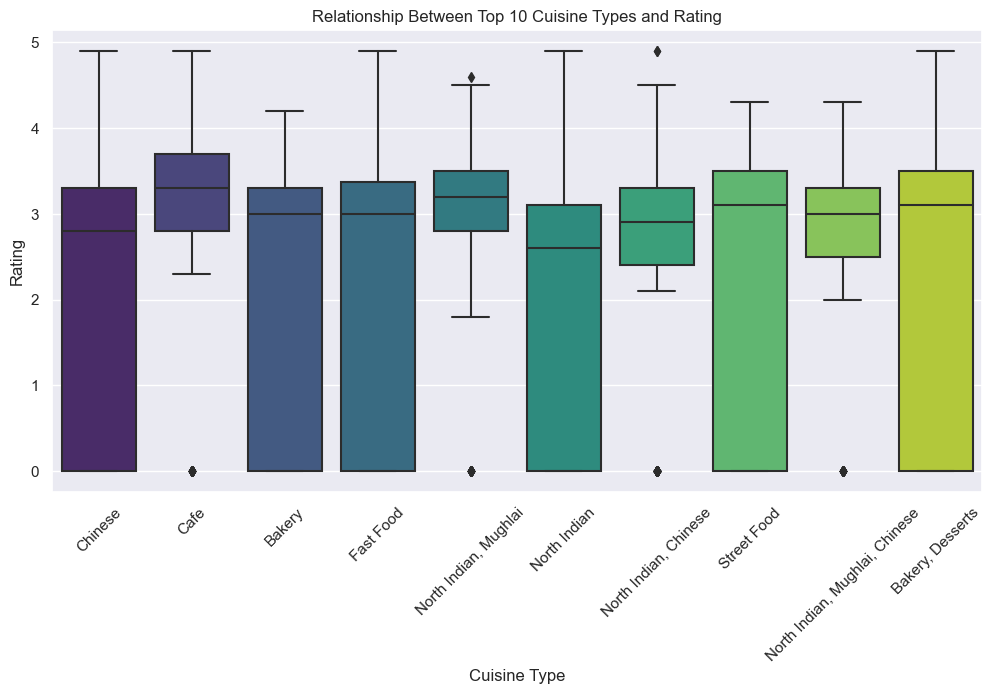

In [19]:
plt.figure(figsize = (12,6))
sns.boxplot(x='Cuisine', y='Rating',data = cuisine_ratings_top_10, palette = 'viridis')
plt.title('Relationship Between Top 10 Cuisine Types and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation = 45)
plt.show()

In [21]:
cuisine_votes = pd.DataFrame({'Cuisine': cuisines, 'Votes': df['Votes']})

In [22]:
cuisine_votes_sum = cuisine_votes.groupby('Cuisine')['Votes'].sum()

In [23]:
popular_cuisines = cuisine_votes_sum.sort_values(ascending=False)

In [24]:
print("Top 10 Most Popular Cuisines Based on Number of Votes:")
print(popular_cuisines.head(10))

Top 10 Most Popular Cuisines Based on Number of Votes:
Cuisine
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


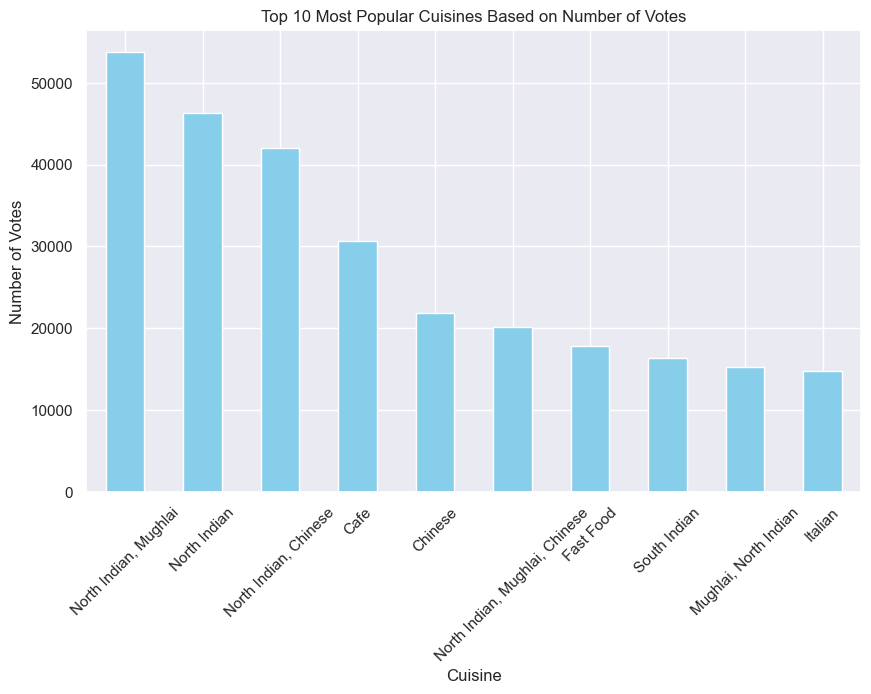

In [25]:
plt.figure(figsize=(10, 6))
popular_cuisines.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines Based on Number of Votes')
plt.xlabel('Cuisine')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()

In [26]:
cuisine_ratings = pd.DataFrame({'Cuisine': cuisines, 'Rating': df['Aggregate rating']})

In [27]:
average_rating_by_cuisine = cuisine_ratings.groupby('Cuisine')['Rating'].mean()

In [28]:
sorted_cuisines_by_rating = average_rating_by_cuisine.sort_values(ascending=False)

In [29]:
print("Top 10 Cuisines with the Highest Average Ratings:")
print(sorted_cuisines_by_rating.head(10))

Top 10 Cuisines with the Highest Average Ratings:
Cuisine
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Rating, dtype: float64


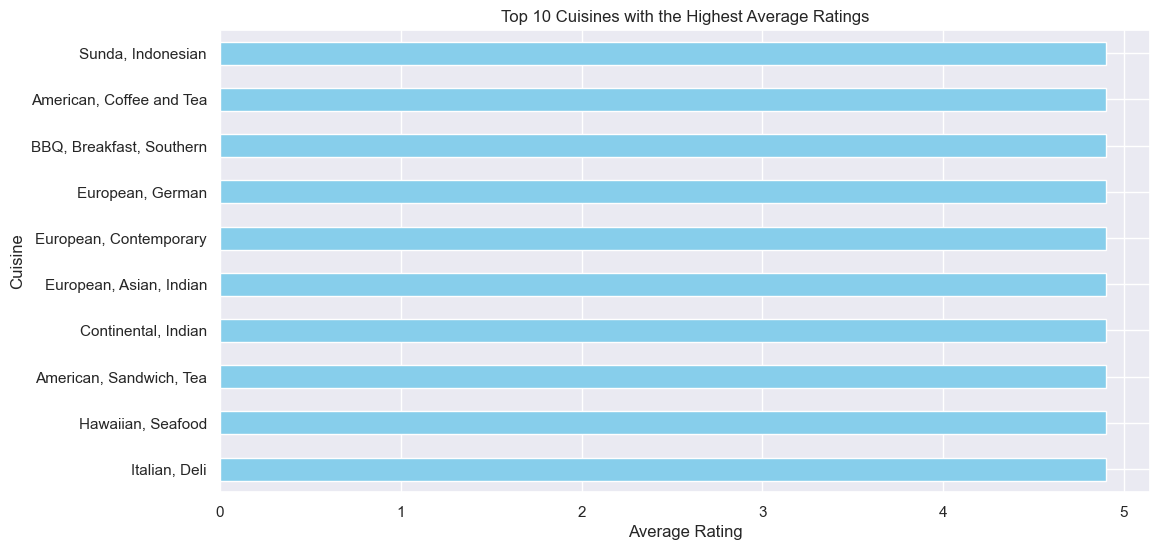

In [30]:
plt.figure(figsize=(12, 6))
sorted_cuisines_by_rating.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

## Task 3 : Data Visualization

#### ◉ Create visualizations to represent the distributionof ratings using different charts (histogram, barplot, etc.).
#### ◉ Compare the average ratings of different cuisinesor cities using appropriate visualizations.
#### ◉ Visualize the relationship between variousfeatures and the target variable to gain insights.

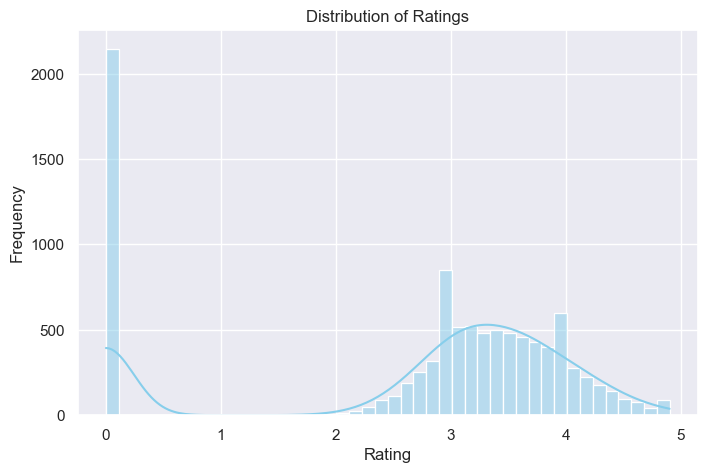

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

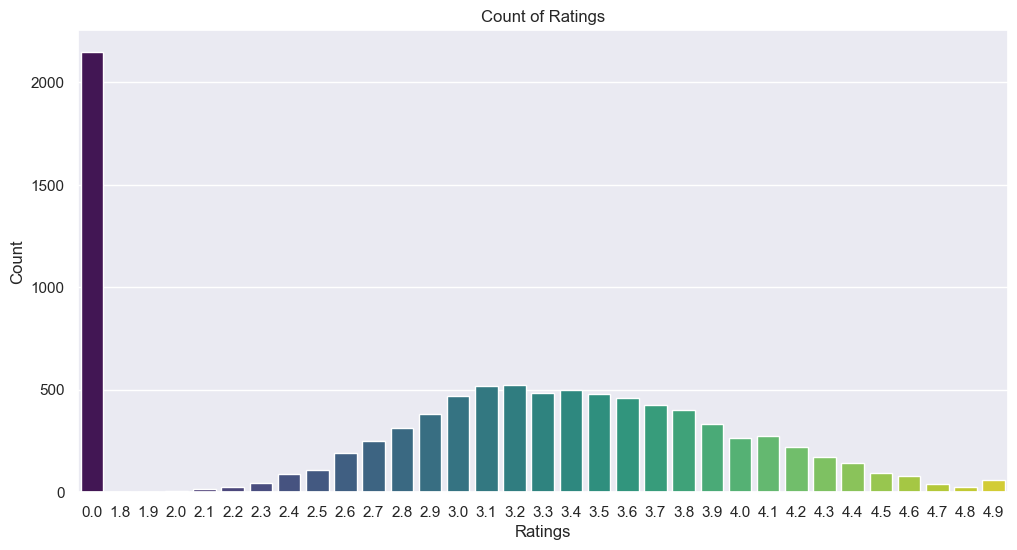

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Aggregate rating', data=df, palette='viridis')
plt.title('Count of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

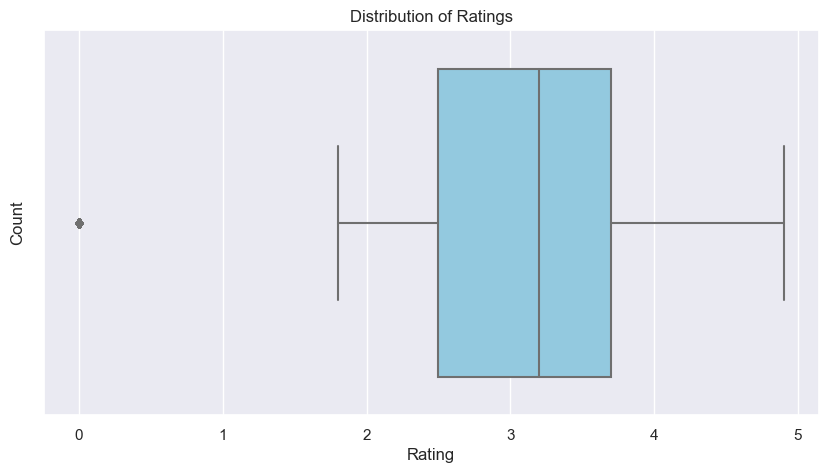

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Aggregate rating', data=df, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [51]:
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

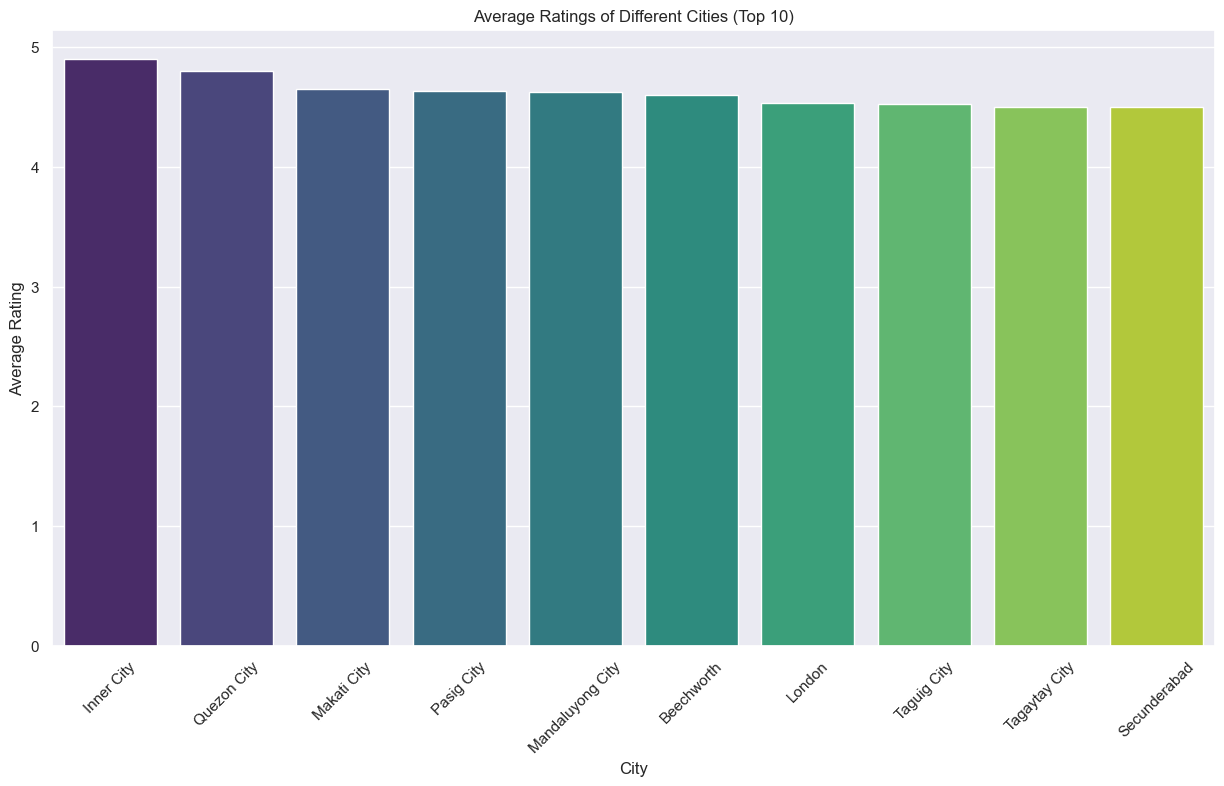

In [58]:
plt.figure(figsize=(15, 8))
sns.barplot(x=average_rating_by_city.head(10).index, y=average_rating_by_city.head(10).values, palette='viridis')
plt.title('Average Ratings of Different Cities (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation = 45)
plt.show()

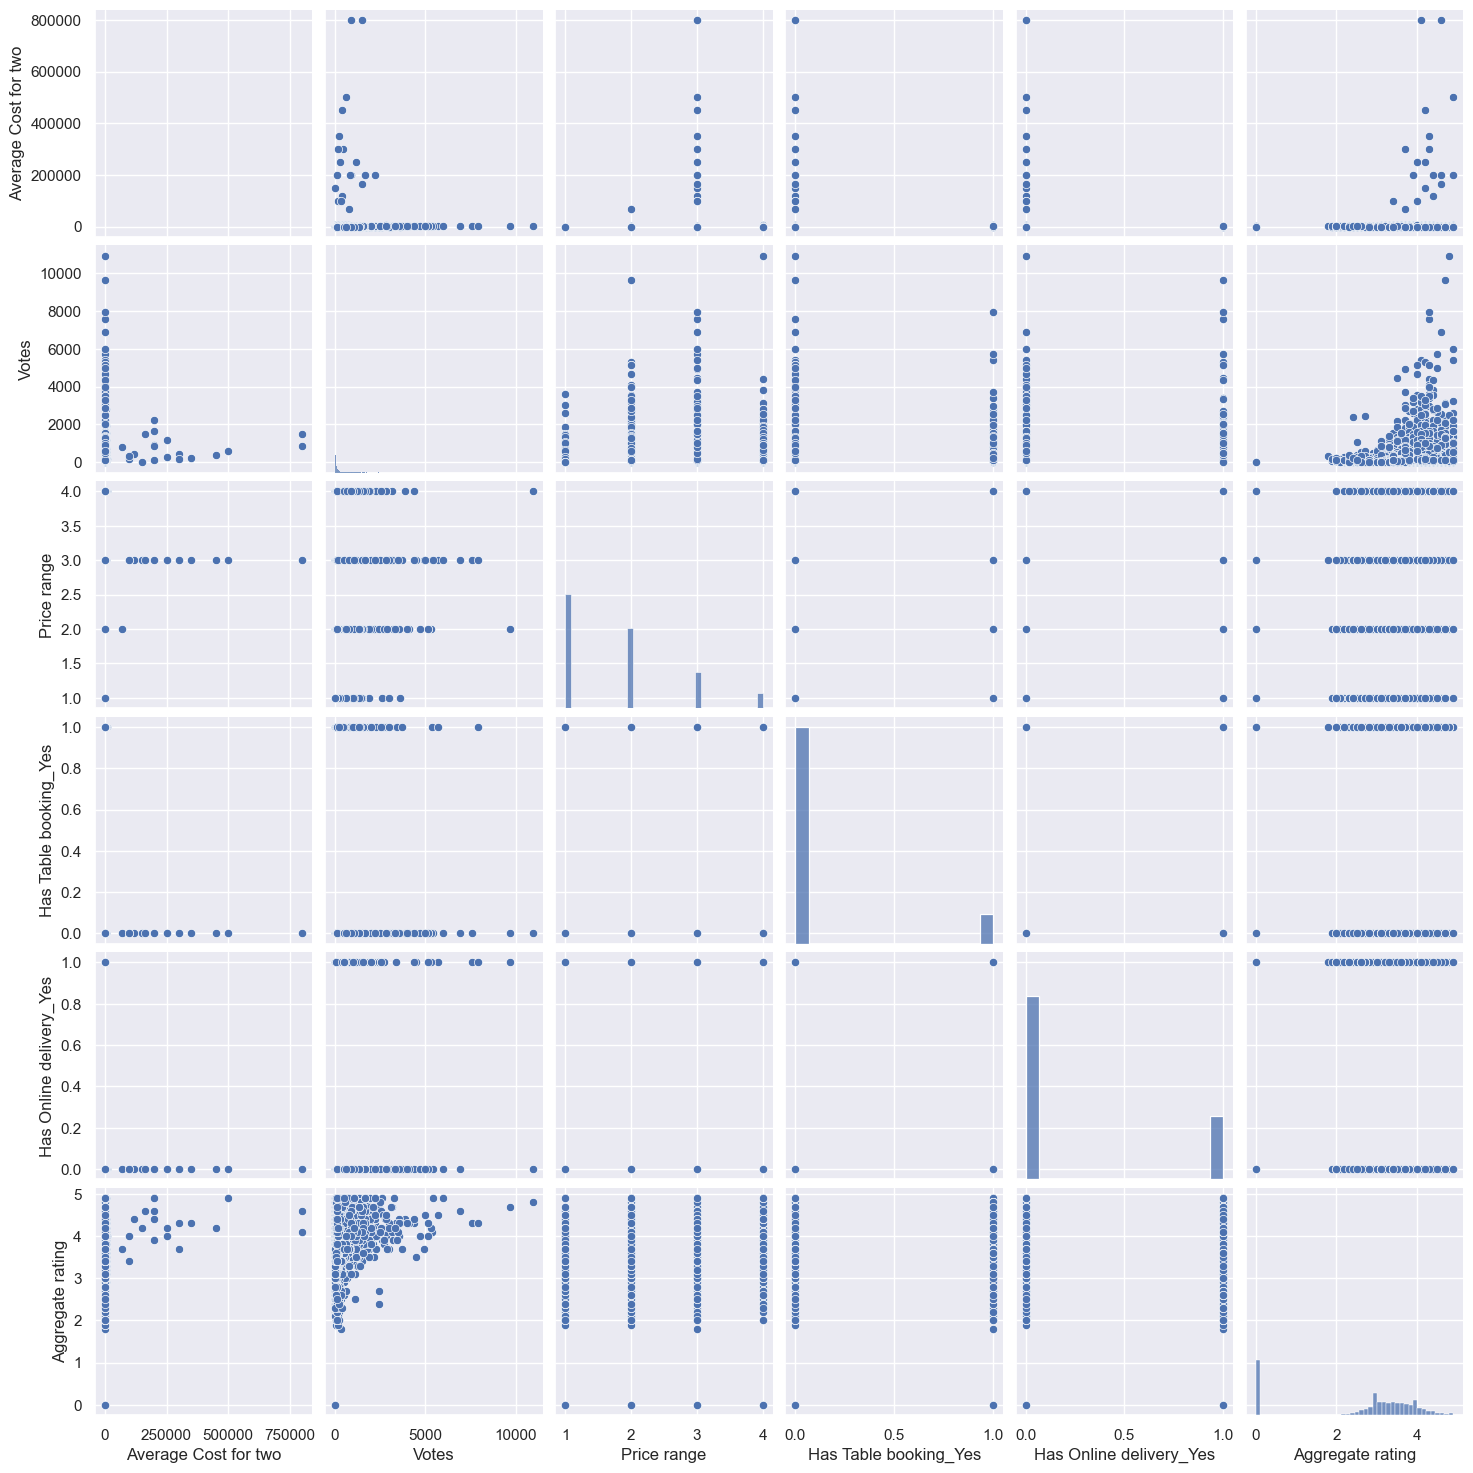

In [60]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes', 'Aggregate rating']
sns.pairplot(df[features])
plt.show()

## OBSERVATION:-


#### ◉ Linear Regression produced an MSE of 1.5085 and an R-squared value is 0.8284.
#### ◉ Decision Tree yielded an MSE of 0.7872 and an R-squared value of 0.9198.
#### ◉ Random Forest displayed the most promising results with the lowest MSE of approximately 0.2137 and the highest R-squared of about 0.9433.

## ----------------------------------------------------Thankyou------------------------------------------------